## *ABOUT ME...*

I am a 'Data Scientist' - read this for a fun [overview](https://towardsdatascience.com/how-it-feels-to-learn-data-science-in-2019-6ee688498029 ) of Data Science

![Data Science](img/dataScienceDog.png)

-------

## Bootcamp aims:
We are going to be using an open Airbnb dataset on NewYork listings to learn how to:  
- Load and manipulate data in Pandas
- Visulise and analyse data using Matplotlib and Seaborn
- Create interactive plots using Plotly
- Mock-up a Dashboard web application using Dash

*My aim is to show what is possible at the same time giving you an idea of how it is done. There are some steps you may not fully understand but I will try and point you in the direction you can do additional reading and experimenting. The key to learning any language or set of modules is to practice and use it.*

**I constantly rely on code documentation, examples and discussions online. You do not need to remember everything. You just need to know where to go and that something exists.**

# Data source 1 - Airbnb
The data source we are going to use is currently the 'hottest' in [Kaggle](https://www.kaggle.com/datasets). It is the New York City Airbnb Open Data for 2019 and it is avaliable [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). 

### Questions:

1. What can we learn about different hosts and areas?
2. ...?

### Aims:

1. Load data and take a look - ensure data types are correct, see what the data 'looks like'
    - for catagorical data can look at number of unique items and examples
    - for numerical data can view distribution
    - for descriptions can look at word frequencies 
    
2. Plot distribution of prices vs neighbourhoods vs neighbourhood group

3. Could plot listings based on lat and long for fun


## 1. Load, view, manipulate data
Pandas is all that is required to do most loading, cleaning and data transformation activities. In most cases Pandas will provide a method for performing certain tasks which are as fast as writing your own functions in [Numpy](https://pypi.org/project/numpy/) or other. There is a free book explaining the Pandas library [here](http://bedford-computing.co.uk/learning/wp-content/uploads/2015/10/Python-for-Data-Analysis.pdf). 

We will also be using [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/), which combined gives all static visulisations you will ever need.

In [28]:
# data reading, cleaning and manupulation
import pandas as pd 

# basic plotting
import matplotlib.pyplot as plt 
# setting so plots will be displayed below the cell (magic function)
%matplotlib inline 

# better looking plots which are easier to create
import seaborn as sns

Pandas can be used to read and write many file types from `.csv` and `.xlsx` to `.json` and `.html` - [IO tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [29]:
# pandas read_csv function 
df_NY = pd.read_csv('data/AB_NYC_2019.csv') # shift+tab to view doc string
# view top 3
df_NY.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

__________________
*Note on Classes*
___________________

In [30]:
# dataframe is a Python class
type(df_NY)

pandas.core.frame.DataFrame

Python is made up of classes and functions that do particular jobs.

A Pandas DataFrame is a class with over 8,000 lines of code behind it. 

In [31]:
# example python class
class MyClass:
    some_other_attribute = [1, 4, 3, 2]
    def __init__(self, name):
        # this is an attribute of the class
        self.name = name
        self.some_attribute = ['this', 'is', 'a', 'list']
        
    def input_new_name(self):
        '''this is a function of the class'''
        new_name = input('insert a new name:')
        # update attribute
        self.name = new_name
        print("name updated to: "+self.name)
        
    def get_name(self):
        '''this is another function'''
        print(self.name)

In [32]:
# initiate class
some_class = MyClass(name='tommy')
some_class.get_name()

tommy


In [33]:
some_class.input_new_name()

insert a new name:dave
name updated to: dave


In [34]:
some_class.some_attribute

['this', 'is', 'a', 'list']

____________________

In [35]:
# check data types - dtypes attribute
df_NY.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##### Column 'last_review' has been interpreted incorrectly

This should have been interpreted as a datetime. To transform can use pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function  

In [36]:
# read as datetime
df_NY['last_review'] = pd.to_datetime(df_NY['last_review'])
df_NY.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [37]:
# the change could then be added to the read_csv() function above 
df_NY = pd.read_csv('data/AB_NYC_2019.csv', parse_dates = ['last_review'])

__________________
*Catagorical data*
___________________

In [38]:
# some observations about the catagorical data
# id, host_name, neighbourhood_group, neighbourhood, room_type

print('Is the ID unique? {}'.format(df_NY['id'].is_unique))
print("There are {} observations and {} columns in this dataset.".format(df_NY.shape[0], df_NY.shape[1]))
print("There are {} unique host_name's in this dataset such as: {}...".format(df_NY['host_name'].nunique(), ", ".join(df_NY['host_name'].unique()[0:5])))
print("There are {} neighbourhood_group's in this dataset: {}".format(df_NY['neighbourhood_group'].nunique(), ", ".join(df_NY['neighbourhood_group'].unique()[0:6])))
print("There are {} neighbourhood's in this dataset such as: {}...".format(df_NY['neighbourhood'].nunique(), ", ".join(df_NY['neighbourhood'].unique()[0:5])))
print("There are {} room_type's in this dataset: {}".format(df_NY['room_type'].nunique(), ", ".join(df_NY['room_type'].unique()[0:5])))

Is the ID unique? True
There are 48895 observations and 16 columns in this dataset.
There are 11452 unique host_name's in this dataset such as: John, Jennifer, Elisabeth, LisaRoxanne, Laura...
There are 5 neighbourhood_group's in this dataset: Brooklyn, Manhattan, Queens, Staten Island, Bronx
There are 221 neighbourhood's in this dataset such as: Kensington, Midtown, Harlem, Clinton Hill, East Harlem...
There are 3 room_type's in this dataset: Private room, Entire home/apt, Shared room


In [39]:
# insert data into string using .format() 
'My name is {} and I am {}'.format("tommy", 22)

'My name is tommy and I am 22'

In [40]:
# is_unique attribute
df_NY['id'].is_unique

True

In [41]:
# number of unique function
df_NY['id'].nunique()

48895

In [42]:
# using the .shape attribute
df_NY.shape

(48895, 16)

In [43]:
type((48895, 16))

tuple

In [44]:
# unique() function
df_NY['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [45]:
# .join()
' ----- '.join(df_NY['room_type'].unique())

'Private room ----- Entire home/apt ----- Shared room'

__________________
*Numerical data*
___________________

In [46]:
# numerical columns
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
# check if contain null
df_NY[numerical_cols].isnull().sum()

price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [47]:
# replace nan with 0 for reviews_per_month
df_NY['reviews_per_month'] = df_NY['reviews_per_month'].fillna(0)

In [48]:
df_NY[numerical_cols].isnull().sum()

price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

___________________
*Lets do some plotting using [seaborn](https://seaborn.pydata.org/tutorial.html)*
____________________

In [49]:
# fake dataset from seaborn
tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

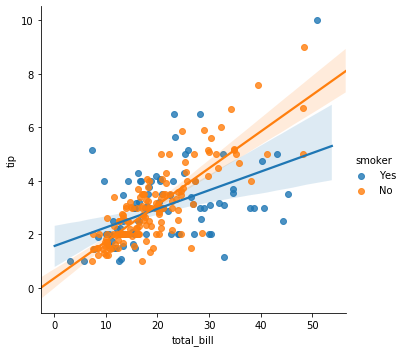

In [50]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue='smoker');

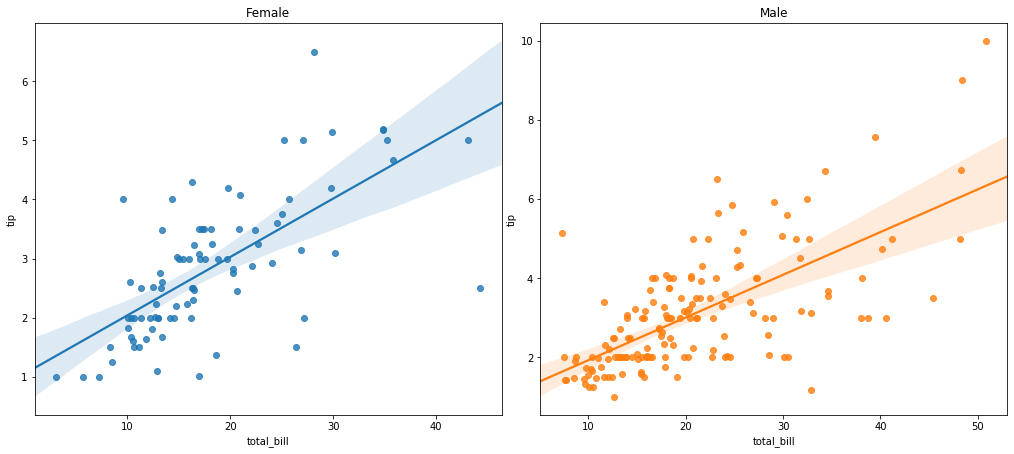

In [51]:
# subplot layout
f, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)
# plots
sns.regplot(x="total_bill", y="tip", data=tips[tips['sex']=='Female'],  ax=axes[0], label='Female');
sns.regplot(x="total_bill", y="tip", data=tips[tips['sex']=='Male'],  ax=axes[1], label='Male');
# layout
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# titles
axes[0].set_title("Female", loc='center', y=1.1)
axes[1].set_title("Male", loc='center', y=1.1)
# show
plt.show()

**Quick method of viewing mutiple correlations use [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)**

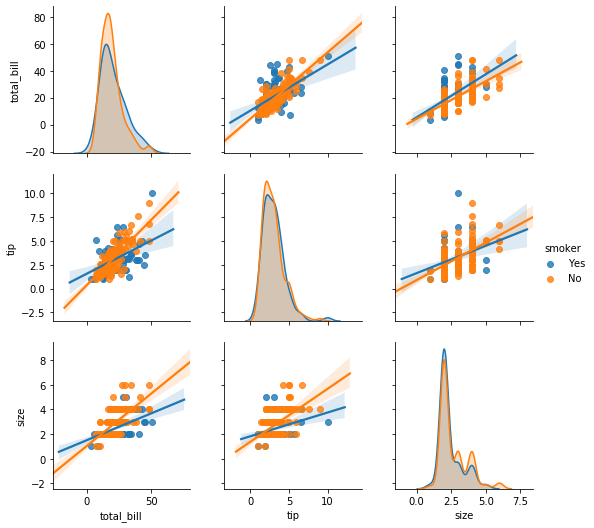

In [52]:
# automatically plot all numerical data
sns.pairplot(tips, hue="smoker", kind="reg");

___________________
*View numerical data in Airbnb dataset*
____________________

In [53]:
df_NY.head(1)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   

   calculated_host_listings_count  availability_365  
0                               6               365

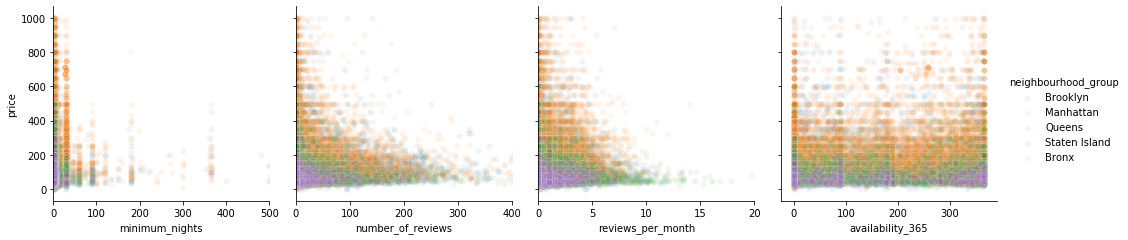

In [81]:
g = sns.pairplot(
    df_NY[df_NY['price']<1000], 
    x_vars=['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365'], 
    y_vars=['price'],
    height=3.5,
    hue='neighbourhood_group',
    plot_kws={'alpha': 0.07},
)
g.axes[0,0].set_xlim((0,500));
g.axes[0,1].set_xlim((0,400));
g.axes[0,2].set_xlim((0,20));

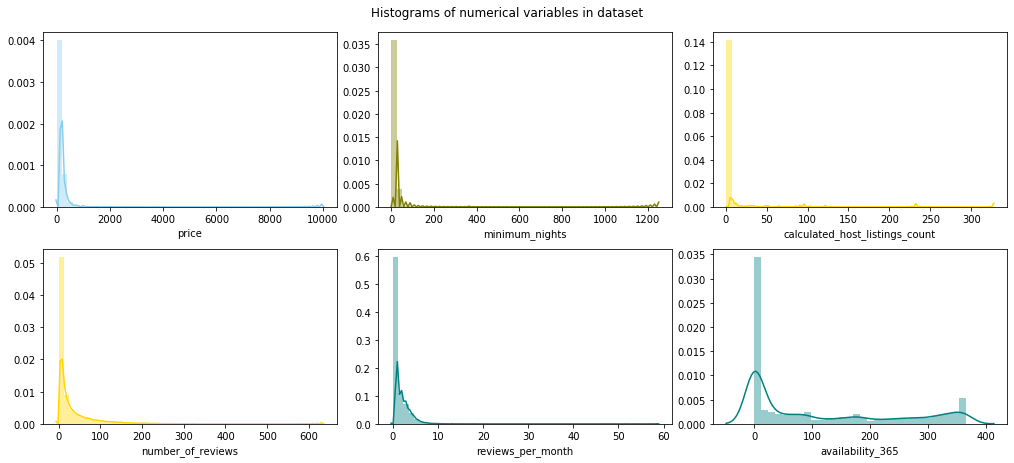

In [82]:
# some observations re. the numerical data
f, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=False)
plt.suptitle("Histograms of numerical variables in dataset", y=1.05)
sns.distplot(df_NY["price"], color="skyblue", ax=axes[0, 0])
sns.distplot(df_NY["minimum_nights"], color="olive", ax=axes[0, 1])
sns.distplot(df_NY["number_of_reviews"], color="gold", ax=axes[1, 0])
sns.distplot(df_NY["reviews_per_month"], color="teal", ax=axes[1, 1])
sns.distplot(df_NY["calculated_host_listings_count"], color="gold", ax=axes[0, 2])
sns.distplot(df_NY["availability_365"], color="teal", ax=axes[1, 2])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

What can we draw  from this ... 

In [83]:
# word cloud for airbnb names
df_NY['name'].head()

0                  Clean & quiet apt home by the park
1                               Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK !
3                     Cozy Entire Floor of Brownstone
4    Entire Apt: Spacious Studio/Loft by central park
Name: name, dtype: object

#### How can we give an overview of the 'name' data?

##### Word cloud?

Word cloud example - https://www.datacamp.com/community/tutorials/wordcloud-python

Wordcloud installation and documentation - https://anaconda.org/conda-forge/wordcloud

In most instances, to install additional moduleS (if not already installed) run `conda install -c conda-forge <module>`

`wordcloud` is only avaliable in the conda-forge respoitory, hence why we add it as an additional source.


In [85]:
# wordcloud package only avaliable via conda-forge
from wordcloud import WordCloud, STOPWORDS

----------

Before running the wordcloud need to clean the text and get it into one continuous string.

As this needs to be applied to each row and requires a set of custom operations, in pandas it is best to create a function and use a [.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method.

Whenever I have a problem like this I will take a single row as an example and figure out what needs to be done. I will then put that into a function and use .apply() to apply it to every row in the column

In [86]:
# example name
ex_name = df_NY['name'][2]
print("\""+ex_name+"\"")
print("Want to lowercase and remove punctuation...")
print("Use .lower() to lower case: \"%s\"" %(ex_name.lower()))
print("Use regular expression to remove punctuation and replace with space... ")

# regular expression
import re
ex_name_cln = re.sub( r"[,.;@#?!&$/:]+\ *", " ", ex_name.lower()).strip()
print("Cleaned string: \"%s\"" %(ex_name_cln))


"THE VILLAGE OF HARLEM....NEW YORK !"
Want to lowercase and remove punctuation...
Use .lower() to lower case: "the village of harlem....new york !"
Use regular expression to remove punctuation and replace with space... 
Cleaned string: "the village of harlem new york"


--------------


[Regular expressions](https://docs.python.org/3.1/howto/regex.html) are the go-to method for capturing and manipulating string patterns.

They are very useful at grabbing email addresses, urls, postcodes etc.

In [87]:
# combine into a single function
def lower_clean_punc(text):
    try:
        clean = re.sub(
            r"[,.;@#?!&$/:-]+\ *", 
            " ", 
            text.lower() # lowercase
        )
    # handle errors due to NaN
    except:
        clean = ""
    return clean

# apply function to every row using apply
df_NY['name_cln'] = df_NY['name'].apply(lower_clean_punc)

In [88]:
lower_clean_punc("1! cdjoj okok ###!")

'1 cdjoj okok  '

In [89]:

# apply function to every row using apply
df_NY['name_cln'] = df_NY['name'].apply(lower_clean_punc)

In [90]:
# create one big string with all names concatinated
text = " ".join(name for name in df_NY['name_cln'])
# remove whitespaces
text_cln = " ".join(word.strip() for word in text.split(" ") if word)
print ("There are {} words the name column.".format(len(text_cln)))
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["apt", "room", "bedroom", "apartment", 'br'])


There are 1815694 words the name column.


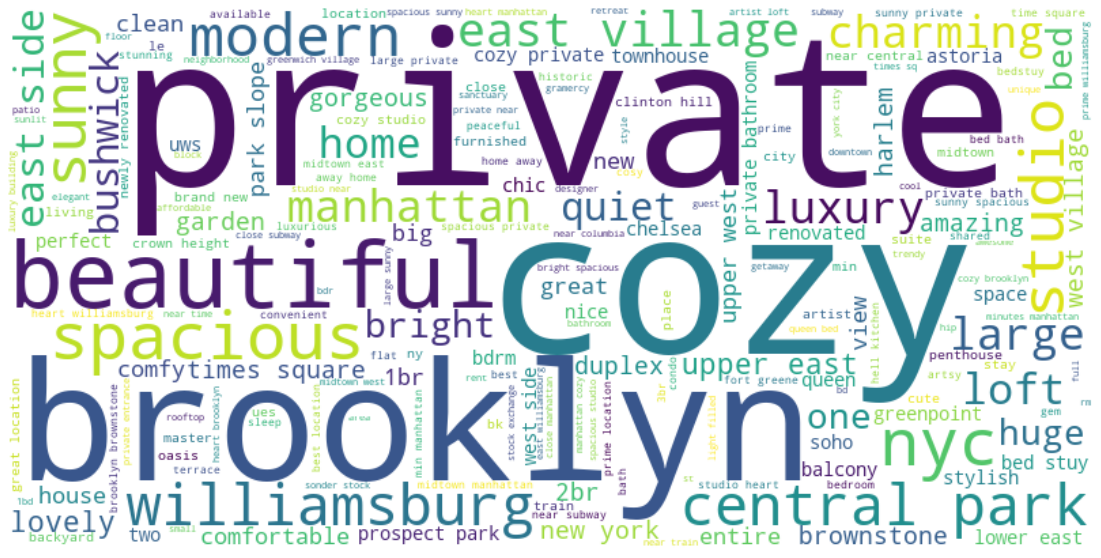

In [91]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white", 
                      width=800, 
                      height=400, 
                      collocations=True).generate(text_cln)

# Display the generated image
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
df_NY.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaT   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

                                          name_cln  
0                clean  quiet apt home by the park  
1                            skylit midtown castle  
2                 the village of harlem new york    
3                  cozy entire floor of brownstone  
4  entire apt spacious studio loft by central park

## 2. More advanced analysis and visulisations


In [93]:
df_NY

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaT               0.00                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaT               0.00                               2   
48891         NaT               0.00                               2   
48892         NaT               0.00                               1   
48893         NaT               0.00                               6   
48894         NaT               0.00                               1   

       availability_365                                           name_cln  
0                   365                  clean  quiet apt home by the park  
1                   355                              skylit midtown castle  
2                   365                   the village of harlem new york    
3                   194                  

In [94]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 90th Percentile
def q75(x):
    return x.quantile(0.75)

# use groupby to get aggregate statistics
df_NY.groupby(['neighbourhood'])['price'].agg('mean').head()

neighbourhood
Allerton          87.595238
Arden Heights     67.250000
Arrochar         115.000000
Arverne          171.779221
Astoria          117.187778
Name: price, dtype: float64

In [95]:
df_NY.groupby(['neighbourhood'])['price'].agg(['min', q25, 'median', q75, 'max']).head()

min    q25  median     q75    max
neighbourhood                                   
Allerton        33  47.00    66.5  104.75    450
Arden Heights   41  62.75    72.5   77.00     83
Arrochar        32  34.00    65.0  125.00    625
Arverne         35  75.00   125.0  200.00   1500
Astoria         25  60.00    85.0  120.00  10000

In [96]:
# sort by median
df_NY.groupby(['neighbourhood'])['price'].agg(['min', q25, 'median', q75, 'max', 'count']).sort_values('median', ascending=False).head()

min     q25  median    q75   max  count
neighbourhood                                          
Fort Wadsworth  800  800.00   800.0  800.0   800      1
Woodrow         700  700.00   700.0  700.0   700      1
Tribeca          60  200.00   295.0  485.0  8500    177
Neponsit        200  237.00   274.0  312.0   350      3
NoHo             75  179.25   250.0  350.0  1795     78

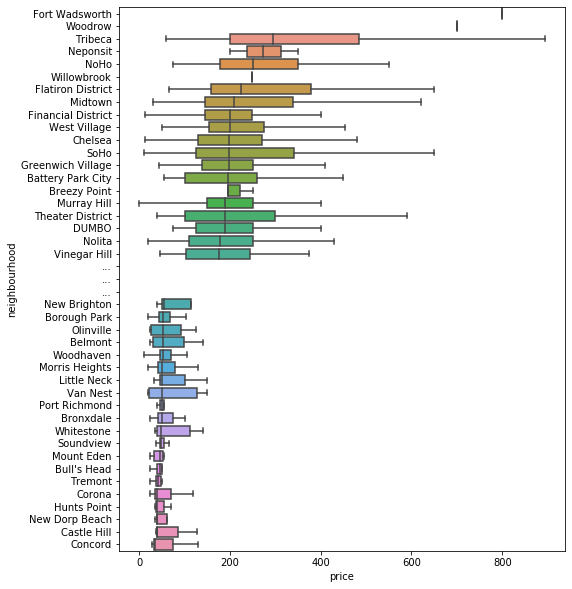

In [97]:
# get top N most expensive neighbourhoods and least expensive
top_N = 20
most_expensive_neighbourhoods = df_NY.groupby(['neighbourhood'])['price'].agg(['median']).sort_values('median', ascending=False).index[:top_N].tolist()
least_expensive_neighbourhoods = df_NY.groupby(['neighbourhood'])['price'].agg(['median']).sort_values('median', ascending=False).index[-top_N:].tolist()
combined_neighbourhoods = most_expensive_neighbourhoods + ['...', '...', '...'] + least_expensive_neighbourhoods

# create a boxplot
plt.figure(figsize=(8,10))
sns.boxplot(
    y='neighbourhood', 
    x='price', 
    data=df_NY[df_NY['neighbourhood'].isin(combined_neighbourhoods)],
    order=combined_neighbourhoods,
    showfliers=False
           )
plt.show()

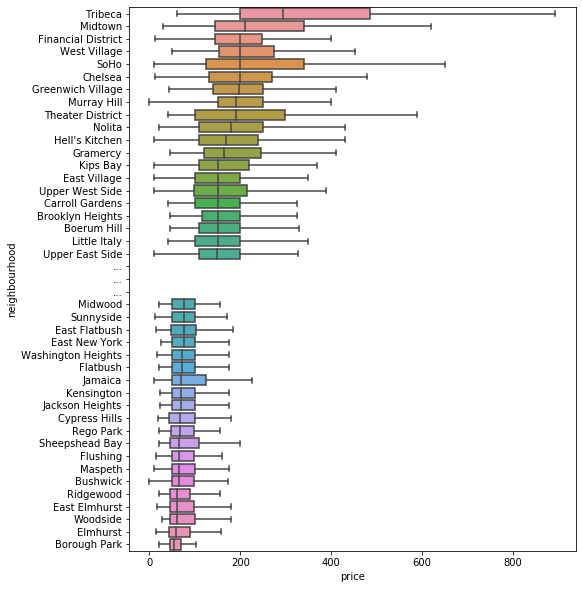

In [98]:
significant_data_points = 100
neighbourhood_counts = df_NY['neighbourhood'].value_counts()
neighbourhoods_to_condsider = neighbourhood_counts[neighbourhood_counts>significant_data_points].index.tolist()

# limit dataframe 
df_NY_lim = df_NY[df_NY['neighbourhood'].isin(neighbourhoods_to_condsider)]

most_expensive_neighbourhoods = df_NY_lim.groupby(['neighbourhood'])['price'].agg(['median']).sort_values('median', ascending=False).index[:top_N].tolist()
least_expensive_neighbourhoods = df_NY_lim.groupby(['neighbourhood'])['price'].agg(['median']).sort_values('median', ascending=False).index[-top_N:].tolist()
combined_neighbourhoods = most_expensive_neighbourhoods + ['...', '...', '...'] + least_expensive_neighbourhoods

# create a boxplot
plt.figure(figsize=(8,10))
sns.boxplot(
    y='neighbourhood', 
    x='price', 
    data=df_NY_lim[df_NY_lim['neighbourhood'].isin(combined_neighbourhoods)],
    order=combined_neighbourhoods,
    showfliers=False
           )
plt.show()

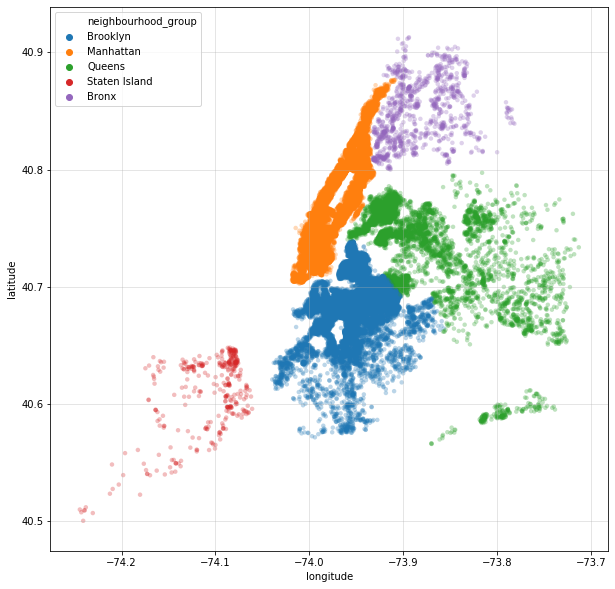

In [99]:
# Map of new york
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', s=20, data=df_NY, linewidth=0, alpha=0.3)
plt.grid(alpha=0.4)
plt.show()

## 3. Interactive visulisations using Plotly

In [100]:
# remove price outsiders and plot heatmap
price_95 = df_NY['price'].quantile(0.95)
price_5 = df_NY['price'].quantile(0.05)
df_NY_0_95 = df_NY[df_NY['price'] < price_95]

To install plotly - `conda install -c plotly plotly`

In [102]:
# create token here - https://www.mapbox.com/studio (if mine fails)
map_box_token = 'pk.eyJ1IjoidG9tbXluZWVsZCIsImEiOiJjazAzeWRycWQxdHRtM2xwZDE1aHVmamNmIn0.Oanb2DTPNinVvgeKxQB7TQ'
import plotly.express as px
px.set_mapbox_access_token(map_box_token)

fig = px.scatter_mapbox(df_NY_0_95, lat="latitude", lon="longitude", color="price", # size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=9)
fig.show()

In [103]:
# top 5%
df_NY_95_100 = df_NY[df_NY['price'] >= price_95]

fig = px.scatter_mapbox(df_NY_95_100, lat="latitude", lon="longitude", color="price", # size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=9)
fig.show()

## 4. Dash for building dashboards...


In [ ]:
# incorperate a slider? Not something which can be easily performed in plotly for a scatter_mapbox

In [ ]:
# use dash .... 

Dash example - 

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv(
    'https://gist.githubusercontent.com/chriddyp/' +
    '5d1ea79569ed194d432e56108a04d188/raw/' +
    'a9f9e8076b837d541398e999dcbac2b2826a81f8/'+
    'gdp-life-exp-2007.csv')


app.layout = html.Div([
    dcc.Graph(
        id='life-exp-vs-gdp',
        figure={
            'data': [
                go.Scatter(
                    x=df[df['continent'] == i]['gdp per capita'],
                    y=df[df['continent'] == i]['life expectancy'],
                    text=df[df['continent'] == i]['country'],
                    mode='markers',
                    opacity=0.7,
                    marker={
                        'size': 15,
                        'line': {'width': 0.5, 'color': 'white'}
                    },
                    name=i
                ) for i in df.continent.unique()
            ],
            'layout': go.Layout(
                xaxis={'type': 'log', 'title': 'GDP Per Capita'},
                yaxis={'title': 'Life Expectancy'},
                margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

### The above will fail because we are trying to execute it in a jupyter notebook. 